<a href="https://colab.research.google.com/github/sumayaalshokili12/COMP30044/blob/main/19F19204%2CSOMAIAH_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## (i) Problem Identification
My aim to estimate house prices based on features such as area, number of bedrooms, location, and year built. This is a **regression problem** because the target variable (Price) is continuous. The goal is to build predictive models to estimate house prices accurately.

In [21]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
import warnings
warnings.filterwarnings("ignore")

# Load dataset
df = pd.read_csv('/content/House Price Prediction Dataset.csv')


In [22]:
# Basic info
print(df.info())
display(df.describe())
display(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Id         2000 non-null   int64 
 1   Area       2000 non-null   int64 
 2   Bedrooms   2000 non-null   int64 
 3   Bathrooms  2000 non-null   int64 
 4   Floors     2000 non-null   int64 
 5   YearBuilt  2000 non-null   int64 
 6   Location   2000 non-null   object
 7   Condition  2000 non-null   object
 8   Garage     2000 non-null   object
 9   Price      2000 non-null   int64 
dtypes: int64(7), object(3)
memory usage: 156.4+ KB
None


,Id,Area,Bedrooms,Bathrooms,Floors,YearBuilt,Price
count,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000
mean,1000.500000,2786.209500,3.003500,2.55250,1.993500,1961.446000,537676.855000
std,577.494589,1295.146799,1.424606,1.10899,0.809188,35.926695,276428.845719
min,1.000000,501.000000,1.000000,1.00000,1.000000,1900.000000,50005.000000
25%,500.750000,1653.000000,2.000000,2.00000,1.000000,1930.000000,300098.000000
50%,1000.500000,2833.000000,3.000000,3.00000,2.000000,1961.000000,539254.000000
75%,1500.250000,3887.500000,4.000000,4.00000,3.000000,1993.000000,780086.000000
max,2000.000000,4999.000000,5.000000,4.00000,3.000000,2023.000000,999656.000000


,Id,Area,Bedrooms,Bathrooms,Floors,YearBuilt,Location,Condition,Garage,Price
0,1,1360,5,4,3,1970,Downtown,Excellent,No,149919
1,2,4272,5,4,3,1958,Downtown,Excellent,No,424998
2,3,3592,2,2,3,1938,Downtown,Good,No,266746
3,4,966,4,2,2,1902,Suburban,Fair,Yes,244020
4,5,4926,1,4,2,1975,Downtown,Fair,Yes,636056


In [23]:
# Drop Id for analysis
df_analysis = df.drop('Id', axis=1)

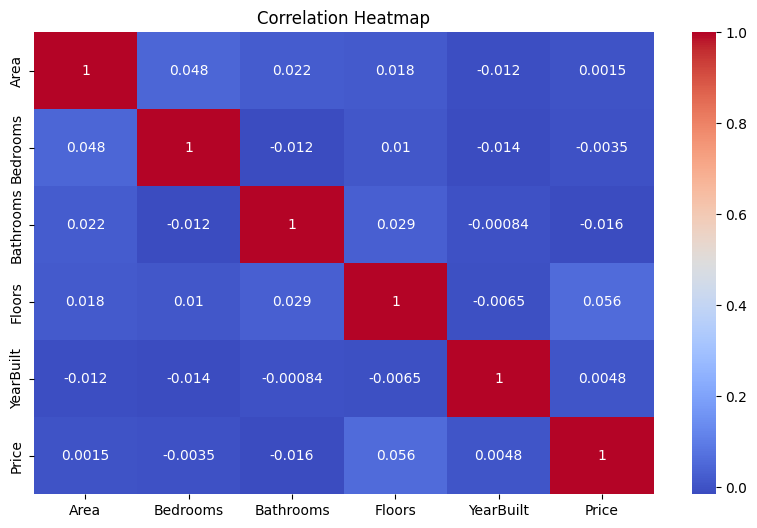

In [24]:
# Heatmap
plt.figure(figsize=(10,6))
sns.heatmap(df_analysis.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


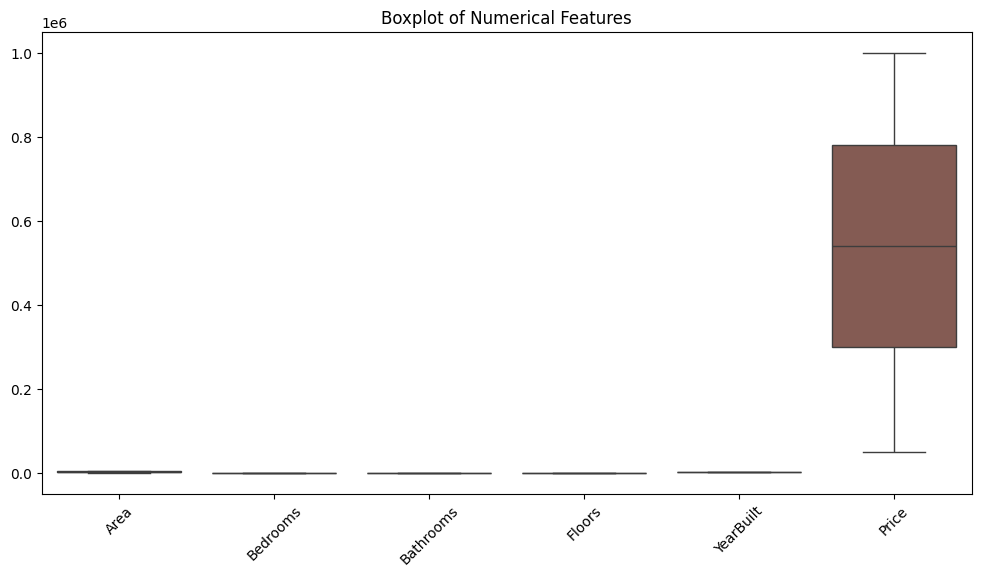

In [25]:
# Box plot for outliers
plt.figure(figsize=(12,6))
sns.boxplot(data=df_analysis.select_dtypes(include=np.number))
plt.title("Boxplot of Numerical Features")
plt.xticks(rotation=45)
plt.show()

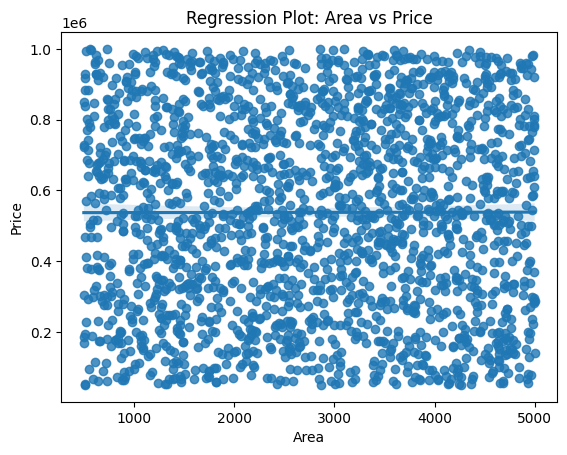

In [26]:
# Regression plot
sns.regplot(x='Area', y='Price', data=df_analysis)
plt.title("Regression Plot: Area vs Price")
plt.show()

In [27]:
# Pearson correlation with p-values
numerical_cols = df_analysis.select_dtypes(include=np.number).columns.tolist()
for col in numerical_cols:
    if col != 'Price':
        r, p = pearsonr(df_analysis[col], df_analysis['Price'])
        print(f'Correlation between {col} and Price: r={r:.2f}, p-value={p:.4f}')

Correlation between Area and Price: r=0.00, p-value=0.9451
Correlation between Bedrooms and Price: r=-0.00, p-value=0.8767
Correlation between Bathrooms and Price: r=-0.02, p-value=0.4818
Correlation between Floors and Price: r=0.06, p-value=0.0124
Correlation between YearBuilt and Price: r=0.00, p-value=0.8286


(iii) Data Preprocessing and Transformation

In [28]:
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

# Drop missing values
df_cleaned = df.dropna()


In [29]:
# Label Encoding
label_enc = LabelEncoder()
for col in ['Location', 'Condition', 'Garage']:
    df_cleaned[col] = label_enc.fit_transform(df_cleaned[col])

In [30]:
# Normalization
scaler = MinMaxScaler()
numerical_features = ['Area', 'Bedrooms', 'Bathrooms', 'Floors', 'YearBuilt']
df_cleaned[numerical_features] = scaler.fit_transform(df_cleaned[numerical_features])


In [32]:
# Features and Target
X = df_cleaned.drop(['Id', 'Price'], axis=1)
y = df_cleaned['Price']

print("Preprocessed feature matrix (X):")
display(X.head())
print("Target (y):")
display(y.head())

Preprocessed feature matrix (X):


,Area,Bedrooms,Bathrooms,Floors,YearBuilt,Location,Condition,Garage
0,0.190974,1.00,1.000000,1.0,0.569106,0,0,0
1,0.838373,1.00,1.000000,1.0,0.471545,0,0,0
2,0.687194,0.25,0.333333,1.0,0.308943,0,2,0
3,0.103379,0.75,0.333333,0.5,0.016260,2,1,1
4,0.983771,0.00,1.000000,0.5,0.609756,0,1,1


Target (y):


,Price
0,149919
1,424998
2,266746
3,244020
4,636056


(iv) Regression Modeling

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [37]:
# Models
lr_model = LinearRegression()
rf_model = RandomForestRegressor(random_state=42)

In [38]:
# Fit models
lr_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [39]:
# Predictions
y_pred_lr = lr_model.predict(X_test)
y_pred_rf = rf_model.predict(X_test)

## (v) Model Evaluation

In [42]:
from sklearn.metrics import mean_absolute_error, r2_score

# Evaluate
mae_lr = mean_absolute_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

mae_rf = mean_absolute_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print("Linear Regression:")
print(f"MAE: {mae_lr:.2f}")
print(f"R²: {r2_lr:.2f}")

print("\nRandom Forest Regression:")
print(f"MAE: {mae_rf:.2f}")
print(f"R²: {r2_rf:.2f}")
best_model = "Random Forest" if r2_rf > r2_lr else "Linear Regression"
print(f"\nBest model: {best_model}")

Linear Regression:
MAE: 244420.00
R²: -0.01

Random Forest Regression:
MAE: 254294.36
R²: -0.11

Best model: Linear Regression


(vi) Visual Comparison of Predictions

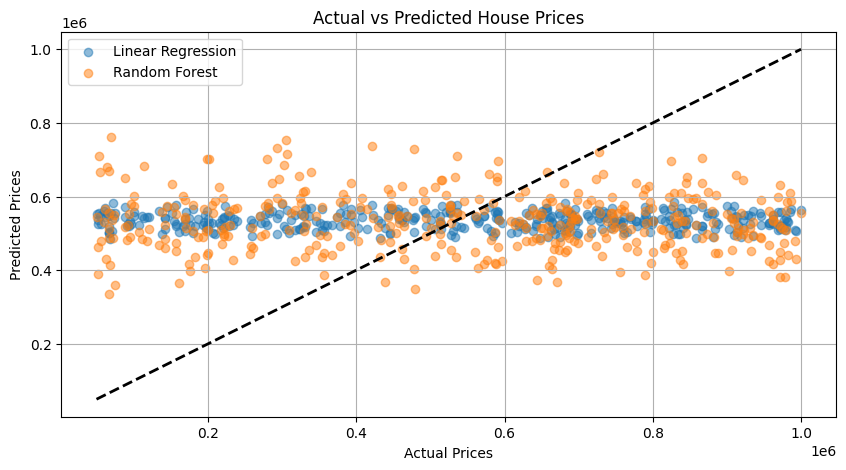

In [43]:
plt.figure(figsize=(10,5))
plt.scatter(y_test, y_pred_lr, alpha=0.5, label="Linear Regression")
plt.scatter(y_test, y_pred_rf, alpha=0.5, label="Random Forest")
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted House Prices")
plt.legend()
plt.grid(True)
plt.show()

In [44]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import pickle

# Load your cleaned dataset
df = pd.read_csv('House Price Prediction Dataset.csv')

# --- Preprocessing ---
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

# Encode categorical
label_enc = LabelEncoder()
for col in ['Location', 'Condition', 'Garage']:
    df[col] = label_enc.fit_transform(df[col])

# Normalize numerical
scaler = MinMaxScaler()
num_cols = ['Area', 'Bedrooms', 'Bathrooms', 'Floors', 'YearBuilt']
df[num_cols] = scaler.fit_transform(df[num_cols])

# Feature matrix and target
X = df.drop(['Id', 'Price'], axis=1)
y = df['Price']

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

# Save model
with open('model.pkl', 'wb') as f:
    pickle.dump(rf_model, f)

# Optional: Save encoders and scaler for deployment
with open('encoders_scaler.pkl', 'wb') as f:
    pickle.dump({
        'location_encoder': label_enc,
        'condition_encoder': label_enc,
        'garage_encoder': label_enc,
        'scaler': scaler
    }, f)


(vi) Basic Model Deployment UI

In [45]:
# 1. Import libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import joblib

In [46]:
# 2. Load your dataset
df = pd.read_csv("House Price Prediction Dataset.csv")

In [47]:
# 1. Encode categorical variables
label_encoders = {}
for col in ['Location', 'Condition', 'Garage']:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le  # Save encoders for deployment

In [48]:
# 2. Normalize numerical features
scaler = MinMaxScaler()
num_cols = ['Area', 'Bedrooms', 'Bathrooms', 'Floors', 'YearBuilt']
df[num_cols] = scaler.fit_transform(df[num_cols])

In [49]:
# 3. Prepare features and target
X = df.drop(['Id', 'Price'], axis=1)
y = df['Price']

In [50]:
# 5. Train model
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [51]:
# 6. Save model and tools
joblib.dump(model, "rf_model.pkl")
joblib.dump(label_encoders, "label_encoders.pkl")
joblib.dump(scaler, "scaler.pkl")

['scaler.pkl']

In [52]:
from google.colab import files
files.download("rf_model.pkl")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>